In [1]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [2]:
# Loading the dataset from the resources folder

sqf_2020_df = pd.read_csv(Path('Resources/sqf-2020.csv'))[['SEARCHED_FLAG',
 'WEAPON_FOUND_FLAG',
 'SUSPECT_REPORTED_AGE',
 'STOP_DURATION_MINUTES',
 'MONTH2',
 'DAY2',
 'OBSERVED_DURATION_MINUTES',
 'FRISKED_FLAG',
 'YEAR2',
 'OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'SUMMONS_ISSUED_FLAG',
 'SUSPECT_ARRESTED_FLAG']]                                                         

sqf_2019_df = pd.read_csv(Path('Resources/sqf-2019.csv'))
sqf_2018_df = pd.read_csv(Path('Resources/sqf-2018.csv'))
sqf_2017_df = pd.read_csv(Path('Resources/sqf-2017.csv'))

dataFrame_list = [sqf_2019_df, sqf_2018_df, sqf_2017_df]
merge_df = pd.concat(dataFrame_list)
merge_df = merge_df[['SEARCHED_FLAG',
 'WEAPON_FOUND_FLAG',
 'SUSPECT_REPORTED_AGE',
 'STOP_DURATION_MINUTES',
 'MONTH2',
 'DAY2',
 'OBSERVED_DURATION_MINUTES',
 'FRISKED_FLAG',
 'YEAR2',
 'OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'SUMMONS_ISSUED_FLAG', 
 'SUSPECT_ARRESTED_FLAG']]
                    

In [3]:
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,Y,Y,18,2,January,Wednesday,1,Y,2020,Y,Y,N,Y
1,N,N,18,5,January,Wednesday,1,Y,2020,Y,Y,N,N
2,N,N,17,5,January,Wednesday,1,Y,2020,Y,Y,N,N
3,Y,N,33,10,January,Wednesday,1,Y,2020,Y,Y,N,Y
4,N,N,40,15,January,Wednesday,0,N,2020,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,N,22,10,December,Thursday,0,Y,2020,Y,Y,N,Y
9540,N,N,48,6,December,Tuesday,1,N,2020,Y,Y,N,N
9541,Y,Y,16,2,December,Saturday,1,Y,2020,Y,Y,N,Y
9542,N,N,60,5,December,Friday,0,N,2020,Y,Y,N,N


In [4]:
merge_df = merge_df.replace('PM','', regex=True)
merge_df = merge_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('PM','', regex=True)
merge_df
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,Y,Y,18,2,January,Wednesday,1,Y,2020,Y,Y,N,Y
1,N,N,18,5,January,Wednesday,1,Y,2020,Y,Y,N,N
2,N,N,17,5,January,Wednesday,1,Y,2020,Y,Y,N,N
3,Y,N,33,10,January,Wednesday,1,Y,2020,Y,Y,N,Y
4,N,N,40,15,January,Wednesday,0,N,2020,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,N,22,10,December,Thursday,0,Y,2020,Y,Y,N,Y
9540,N,N,48,6,December,Tuesday,1,N,2020,Y,Y,N,N
9541,Y,Y,16,2,December,Saturday,1,Y,2020,Y,Y,N,Y
9542,N,N,60,5,December,Friday,0,N,2020,Y,Y,N,N


In [5]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column SEARCHED_FLAG has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column MONTH2 has 0 null values
Column DAY2 has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column FRISKED_FLAG has 0 null values
Column YEAR2 has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values


In [6]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
missing_values_table(merge_df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
merge_df.dtypes

SEARCHED_FLAG                   object
WEAPON_FOUND_FLAG               object
SUSPECT_REPORTED_AGE            object
STOP_DURATION_MINUTES          float64
MONTH2                          object
DAY2                            object
OBSERVED_DURATION_MINUTES      float64
FRISKED_FLAG                    object
YEAR2                          float64
OFFICER_IN_UNIFORM_FLAG         object
OFFICER_EXPLAINED_STOP_FLAG     object
SUMMONS_ISSUED_FLAG             object
SUSPECT_ARRESTED_FLAG           object
dtype: object

In [9]:
# Generate our categorical variable lists
float_columns = merge_df.dtypes[merge_df.dtypes == "float"].index.tolist()
len(float_columns)

3

In [10]:
# Check the number of unique values in each column
merge_df[float_columns]

,STOP_DURATION_MINUTES,OBSERVED_DURATION_MINUTES,YEAR2
0,10.0,1.0,2019.0
1,10.0,1.0,2019.0
2,4.0,1.0,2019.0
3,5.0,0.0,2019.0
4,5.0,1.0,2019.0
...,...,...,...
11624,10.0,1.0,2017.0
11625,5.0,1.0,2017.0
11626,2.0,2.0,2017.0
11627,10.0,2.0,2017.0


In [11]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

10

In [12]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

SEARCHED_FLAG                   3
WEAPON_FOUND_FLAG               3
SUSPECT_REPORTED_AGE           84
MONTH2                         12
DAY2                            7
FRISKED_FLAG                    3
OFFICER_IN_UNIFORM_FLAG         3
OFFICER_EXPLAINED_STOP_FLAG     2
SUMMONS_ISSUED_FLAG             3
SUSPECT_ARRESTED_FLAG           2
dtype: int64

In [13]:
# Finding the value_counts of each column
for c in merge_df.columns:
    print("---- %s ---" % c)
    print(merge_df[c].value_counts())

---- SEARCHED_FLAG ---
N    23549
Y    12546
(        1
Name: SEARCHED_FLAG, dtype: int64
---- WEAPON_FOUND_FLAG ---
N    32862
Y     3220
(       14
Name: WEAPON_FOUND_FLAG, dtype: int64
---- SUSPECT_REPORTED_AGE ---
(null)    2499
17        1784
18        1757
16        1689
20        1617
          ... 
9            1
99           1
81           1
83           1
87           1
Name: SUSPECT_REPORTED_AGE, Length: 84, dtype: int64
---- STOP_DURATION_MINUTES ---
5.0      8344
10.0     6419
15.0     2601
2.0      2317
3.0      2194
         ... 
211.0       1
155.0       1
115.0       1
517.0       1
540.0       1
Name: STOP_DURATION_MINUTES, Length: 167, dtype: int64
---- MONTH2 ---
March        3437
April        3373
May          3371
June         3134
July         3058
January      3051
October      3004
August       2978
February     2878
September    2802
November     2668
December     2342
Name: MONTH2, dtype: int64
---- DAY2 ---
Saturday     5745
Wednesday    5584
Thursday     54

In [14]:
merge_df['SEARCHED_FLAG'] = merge_df['SEARCHED_FLAG'].str.replace('(','Y')
sqf_2020_df['SEARCHED_FLAG'] = sqf_2020_df['SEARCHED_FLAG'].str.replace('(','Y')
merge_df['SEARCHED_FLAG']

0        N
1        Y
2        N
3        N
4        N
        ..
11624    N
11625    N
11626    Y
11627    Y
11628    Y
Name: SEARCHED_FLAG, Length: 36096, dtype: object

In [15]:
merge_df['SEARCHED_FLAG'].value_counts()

N    23549
Y    12547
Name: SEARCHED_FLAG, dtype: int64

In [16]:
merge_df['WEAPON_FOUND_FLAG'] = merge_df['WEAPON_FOUND_FLAG'].str.replace('(','Y')
sqf_2020_df['WEAPON_FOUND_FLAG'] = sqf_2020_df['WEAPON_FOUND_FLAG'].str.replace('(','Y')
merge_df['WEAPON_FOUND_FLAG']

0        N
1        N
2        N
3        N
4        N
        ..
11624    N
11625    N
11626    Y
11627    N
11628    N
Name: WEAPON_FOUND_FLAG, Length: 36096, dtype: object

In [17]:
merge_df['WEAPON_FOUND_FLAG'].value_counts()

N    32862
Y     3234
Name: WEAPON_FOUND_FLAG, dtype: int64

In [18]:
# Removing nulls
merge_df['SUSPECT_REPORTED_AGE'] = merge_df['SUSPECT_REPORTED_AGE'].str.replace('(null)','0')
sqf_2020_df['SUSPECT_REPORTED_AGE'] = sqf_2020_df['SUSPECT_REPORTED_AGE'].str.replace('(null)','0')
# Removing special character
merge_df.SUSPECT_REPORTED_AGE = merge_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_REPORTED_AGE = sqf_2020_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')
merge_df['SUSPECT_REPORTED_AGE'].value_counts()

0     2525
17    1784
18    1757
16    1689
20    1617
      ... 
83       1
99       1
9        1
81       1
87       1
Name: SUSPECT_REPORTED_AGE, Length: 83, dtype: int64

In [19]:
merge_df['FRISKED_FLAG'] = merge_df['FRISKED_FLAG'].str.replace('V','N')
sqf_2020_df['FRISKED_FLAG'] = sqf_2020_df['FRISKED_FLAG'].str.replace('V','N')
merge_df['FRISKED_FLAG'].value_counts()

Y    21185
N    14911
Name: FRISKED_FLAG, dtype: int64

In [20]:
merge_df['OFFICER_IN_UNIFORM_FLAG'] = merge_df['OFFICER_IN_UNIFORM_FLAG'].str.replace('(','Y')
sqf_2020_df['OFFICER_IN_UNIFORM_FLAG'] = sqf_2020_df['OFFICER_IN_UNIFORM_FLAG'].str.replace('(','Y')
merge_df['OFFICER_IN_UNIFORM_FLAG'].value_counts()

Y    26446
N     9650
Name: OFFICER_IN_UNIFORM_FLAG, dtype: int64

In [21]:
sqf_2020_df['SUSPECT_REPORTED_AGE'] = sqf_2020_df['SUSPECT_REPORTED_AGE'].str.replace(' ','0')

In [22]:
sqf_2020_df['SUSPECT_REPORTED_AGE']=sqf_2020_df['SUSPECT_REPORTED_AGE'].fillna(0)

In [23]:
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,Y,Y,18,2,January,Wednesday,1,Y,2020,Y,Y,N,Y
1,N,N,18,5,January,Wednesday,1,Y,2020,Y,Y,N,N
2,N,N,17,5,January,Wednesday,1,Y,2020,Y,Y,N,N
3,Y,N,33,10,January,Wednesday,1,Y,2020,Y,Y,N,Y
4,N,N,40,15,January,Wednesday,0,N,2020,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,N,22,10,December,Thursday,0,Y,2020,Y,Y,N,Y
9540,N,N,48,6,December,Tuesday,1,N,2020,Y,Y,N,N
9541,Y,Y,16,2,December,Saturday,1,Y,2020,Y,Y,N,Y
9542,N,N,60,5,December,Friday,0,N,2020,Y,Y,N,N


In [24]:
# Drop the null columns where all values are null
sqf_2020_df = sqf_2020_df.dropna(axis='columns', how='all')
merge_df = merge_df.dropna(axis='columns', how='all')
merge_df
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,Y,Y,18,2,January,Wednesday,1,Y,2020,Y,Y,N,Y
1,N,N,18,5,January,Wednesday,1,Y,2020,Y,Y,N,N
2,N,N,17,5,January,Wednesday,1,Y,2020,Y,Y,N,N
3,Y,N,33,10,January,Wednesday,1,Y,2020,Y,Y,N,Y
4,N,N,40,15,January,Wednesday,0,N,2020,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,N,22,10,December,Thursday,0,Y,2020,Y,Y,N,Y
9540,N,N,48,6,December,Tuesday,1,N,2020,Y,Y,N,N
9541,Y,Y,16,2,December,Saturday,1,Y,2020,Y,Y,N,Y
9542,N,N,60,5,December,Friday,0,N,2020,Y,Y,N,N


In [25]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEARCHED_FLAG                36096 non-null  object 
 1   WEAPON_FOUND_FLAG            36096 non-null  object 
 2   SUSPECT_REPORTED_AGE         36096 non-null  object 
 3   STOP_DURATION_MINUTES        36096 non-null  float64
 4   MONTH2                       36096 non-null  object 
 5   DAY2                         36096 non-null  object 
 6   OBSERVED_DURATION_MINUTES    36096 non-null  float64
 7   FRISKED_FLAG                 36096 non-null  object 
 8   YEAR2                        36096 non-null  float64
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  object 
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  object 
 11  SUMMONS_ISSUED_FLAG          36096 non-null  object 
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  object 
dtypes: float64(3), o

In [26]:
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,N,N,30,10.0,January,Wednesday,1.0,Y,2019.0,Y,Y,N,N
1,Y,N,22,10.0,January,Tuesday,1.0,N,2019.0,N,Y,N,Y
2,N,N,56,4.0,January,Saturday,1.0,N,2019.0,Y,Y,N,Y
3,N,N,0,5.0,January,Monday,0.0,N,2019.0,Y,Y,N,N
4,N,N,21,5.0,January,Tuesday,1.0,Y,2019.0,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,N,N,22,10.0,December,Friday,1.0,Y,2017.0,Y,Y,N,Y
11625,N,N,31,5.0,December,Wednesday,1.0,Y,2017.0,N,Y,N,N
11626,Y,Y,50,2.0,October,Saturday,2.0,Y,2017.0,N,Y,N,Y
11627,Y,N,20,10.0,December,Tuesday,2.0,N,2017.0,N,Y,N,Y


In [27]:
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH2,DAY2,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR2,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,N,N,30,10.0,January,Wednesday,1.0,Y,2019.0,Y,Y,N,N
1,Y,N,22,10.0,January,Tuesday,1.0,N,2019.0,N,Y,N,Y
2,N,N,56,4.0,January,Saturday,1.0,N,2019.0,Y,Y,N,Y
3,N,N,0,5.0,January,Monday,0.0,N,2019.0,Y,Y,N,N
4,N,N,21,5.0,January,Tuesday,1.0,Y,2019.0,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,N,N,22,10.0,December,Friday,1.0,Y,2017.0,Y,Y,N,Y
11625,N,N,31,5.0,December,Wednesday,1.0,Y,2017.0,N,Y,N,N
11626,Y,Y,50,2.0,October,Saturday,2.0,Y,2017.0,N,Y,N,Y
11627,Y,N,20,10.0,December,Tuesday,2.0,N,2017.0,N,Y,N,Y


In [28]:
sqf_2020_df = sqf_2020_df.fillna(0)
merge_df = merge_df.fillna(0)

In [29]:
merge_df['YEAR2'] = merge_df['YEAR2'].round(0).astype(int)
sqf_2020_df['YEAR2'] = sqf_2020_df['YEAR2'].round(0).astype(int)
merge_df['YEAR2']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
11624    2017
11625    2017
11626    2017
11627    2017
11628    2017
Name: YEAR2, Length: 36096, dtype: int32

In [30]:
sqf_2020_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,N,N,30,10.0,January,Wednesday,1.0,Y,2019,Y,Y,N,N
1,Y,N,22,10.0,January,Tuesday,1.0,N,2019,N,Y,N,Y
2,N,N,56,4.0,January,Saturday,1.0,N,2019,Y,Y,N,Y
3,N,N,0,5.0,January,Monday,0.0,N,2019,Y,Y,N,N
4,N,N,21,5.0,January,Tuesday,1.0,Y,2019,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,N,N,22,10.0,December,Friday,1.0,Y,2017,Y,Y,N,Y
11625,N,N,31,5.0,December,Wednesday,1.0,Y,2017,N,Y,N,N
11626,Y,Y,50,2.0,October,Saturday,2.0,Y,2017,N,Y,N,Y
11627,Y,N,20,10.0,December,Tuesday,2.0,N,2017,N,Y,N,Y


In [31]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^index')]
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,N,N,30,10.0,January,Wednesday,1.0,Y,2019,Y,Y,N,N
1,Y,N,22,10.0,January,Tuesday,1.0,N,2019,N,Y,N,Y
2,N,N,56,4.0,January,Saturday,1.0,N,2019,Y,Y,N,Y
3,N,N,0,5.0,January,Monday,0.0,N,2019,Y,Y,N,N
4,N,N,21,5.0,January,Tuesday,1.0,Y,2019,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,N,N,22,10.0,December,Friday,1.0,Y,2017,Y,Y,N,Y
11625,N,N,31,5.0,December,Wednesday,1.0,Y,2017,N,Y,N,N
11626,Y,Y,50,2.0,October,Saturday,2.0,Y,2017,N,Y,N,Y
11627,Y,N,20,10.0,December,Tuesday,2.0,N,2017,N,Y,N,Y


In [32]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,N,N,30,10.0,January,Wednesday,1.0,Y,2019,Y,Y,N,N
1,Y,N,22,10.0,January,Tuesday,1.0,N,2019,N,Y,N,Y
2,N,N,56,4.0,January,Saturday,1.0,N,2019,Y,Y,N,Y
3,N,N,0,5.0,January,Monday,0.0,N,2019,Y,Y,N,N
4,N,N,21,5.0,January,Tuesday,1.0,Y,2019,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,N,N,22,10.0,December,Friday,1.0,Y,2017,Y,Y,N,Y
11625,N,N,31,5.0,December,Wednesday,1.0,Y,2017,N,Y,N,N
11626,Y,Y,50,2.0,October,Saturday,2.0,Y,2017,N,Y,N,Y
11627,Y,N,20,10.0,December,Tuesday,2.0,N,2017,N,Y,N,Y


In [33]:
merge_df['SUSPECT_REPORTED_AGE']
# merge_df['SUSPECT_HEIGHT']
# merge_df['SUSPECT_WEIGHT']
# merge_df['STOP_LOCATION_X']
# merge_df['STOP_LOCATION_Y']


0        30
1        22
2        56
3         0
4        21
         ..
11624    22
11625    31
11626    50
11627    20
11628    27
Name: SUSPECT_REPORTED_AGE, Length: 36096, dtype: object

In [34]:
merge_df['STOP_DURATION_MINUTES'] = merge_df['STOP_DURATION_MINUTES'].round(0).astype(int)
sqf_2020_df['STOP_DURATION_MINUTES'] = sqf_2020_df['STOP_DURATION_MINUTES'].round(0).astype(int)
merge_df['STOP_DURATION_MINUTES']

0        10
1        10
2         4
3         5
4         5
         ..
11624    10
11625     5
11626     2
11627    10
11628    10
Name: STOP_DURATION_MINUTES, Length: 36096, dtype: int32

In [35]:
merge_df['OBSERVED_DURATION_MINUTES'] = merge_df['OBSERVED_DURATION_MINUTES'].round(0).astype(int)
sqf_2020_df['OBSERVED_DURATION_MINUTES'] = sqf_2020_df['OBSERVED_DURATION_MINUTES'].round(0).astype(int)
merge_df['OBSERVED_DURATION_MINUTES']

0        1
1        1
2        1
3        0
4        1
        ..
11624    1
11625    1
11626    2
11627    2
11628    1
Name: OBSERVED_DURATION_MINUTES, Length: 36096, dtype: int32

In [36]:
# merge_df['STOP_WAS_INITIATED']              
# merge_df['ISSUING_OFFICER_RANK']           
# merge_df['SUSPECTED_CRIME_DESCRIPTION']     
# merge_df['SUSPECT_SEX']                     
# merge_df['SUSPECT_RACE_DESCRIPTION']        
# merge_df['SUSPECT_BODY_BUILD_TYPE']         
# merge_df['SUSPECT_EYE_COLOR']               
# merge_df['SUSPECT_HAIR_COLOR']              
# merge_df['STOP_LOCATION_BORO_NAME']        

In [37]:
# Transform Previous Customer column
def changeStatus(status):
    if status == "N":
        return 0
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
merge_df['SUMMONS_ISSUED_FLAG'] = merge_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
sqf_2020_df['SUMMONS_ISSUED_FLAG'] = sqf_2020_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
# merge_df.head()

In [38]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [39]:
# merge_df = merge_df[merge_df["SUMMONS_ISSUED_FLAG"].str.contains("()")==False]
#merge_df.SUMMONS_ISSUED_FLAG = merge_df.SUMMONS_ISSUED_FLAG.str.replace('[^\d]+', '')

In [40]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [41]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column SEARCHED_FLAG has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column MONTH has 0 null values
Column DAY has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column FRISKED_FLAG has 0 null values
Column YEAR has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values


In [42]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

9

In [43]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

SEARCHED_FLAG                   2
WEAPON_FOUND_FLAG               2
SUSPECT_REPORTED_AGE           83
MONTH                          12
DAY                             7
FRISKED_FLAG                    2
OFFICER_IN_UNIFORM_FLAG         2
OFFICER_EXPLAINED_STOP_FLAG     2
SUSPECT_ARRESTED_FLAG           2
dtype: int64

In [44]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SEARCHED_FLAG                36096 non-null  object
 1   WEAPON_FOUND_FLAG            36096 non-null  object
 2   SUSPECT_REPORTED_AGE         36096 non-null  object
 3   STOP_DURATION_MINUTES        36096 non-null  int32 
 4   MONTH                        36096 non-null  object
 5   DAY                          36096 non-null  object
 6   OBSERVED_DURATION_MINUTES    36096 non-null  int32 
 7   FRISKED_FLAG                 36096 non-null  object
 8   YEAR                         36096 non-null  int32 
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  object
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  object
 11  SUMMONS_ISSUED_FLAG          36096 non-null  int64 
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  object
dtypes: int32(3), int64(1), object(9

In [45]:
merge_df['SUSPECT_ARRESTED_FLAG'].value_counts()
#merge_df['SUMMONS_ISSUED_FLAG'].value_counts()


N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [46]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [48]:
merge_df["SUMMONS_ISSUED_FLAG"] = merge_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)
sqf_2020_df["SUMMONS_ISSUED_FLAG"] = sqf_2020_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)


In [49]:
merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].apply(pd.to_numeric)
sqf_2020_df["SUSPECT_REPORTED_AGE"] = sqf_2020_df["SUSPECT_REPORTED_AGE"].apply(pd.to_numeric)


In [51]:
merge_df["STOP_DURATION_MINUTES"] = merge_df["STOP_DURATION_MINUTES"].apply(pd.to_numeric)
sqf_2020_df["STOP_DURATION_MINUTES"] = sqf_2020_df["STOP_DURATION_MINUTES"].apply(pd.to_numeric)



In [68]:
merge_df["YEAR"] = merge_df["YEAR"].apply(pd.to_numeric)
sqf_2020_df["YEAR"] = sqf_2020_df["YEAR"].apply(pd.to_numeric)


In [69]:
merge_df['STOP_DURATION_MINUTES'] = merge_df['STOP_DURATION_MINUTES'].astype(int)
sqf_2020_df["STOP_DURATION_MINUTES"] = sqf_2020_df["STOP_DURATION_MINUTES"].astype(int)

In [70]:
merge_df['OBSERVED_DURATION_MINUTES'] = merge_df['OBSERVED_DURATION_MINUTES'].astype(int)
sqf_2020_df["OBSERVED_DURATION_MINUTES"] = sqf_2020_df["OBSERVED_DURATION_MINUTES"].astype(int)

In [71]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                36096 non-null  int32
 1   WEAPON_FOUND_FLAG            36096 non-null  int64
 2   SUSPECT_REPORTED_AGE         36096 non-null  int64
 3   STOP_DURATION_MINUTES        36096 non-null  int32
 4   MONTH                        36096 non-null  int32
 5   DAY                          36096 non-null  int32
 6   OBSERVED_DURATION_MINUTES    36096 non-null  int32
 7   FRISKED_FLAG                 36096 non-null  int64
 8   YEAR                         36096 non-null  int64
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  int64
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  int64
 11  SUMMONS_ISSUED_FLAG          36096 non-null  int64
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  int64
dtypes: int32(5), int64(8)
memory usage: 3.2 MB


In [72]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,0,0,30,10,4,6,1,1,2019,1,1,0,0
1,1,0,22,10,4,5,1,0,2019,0,1,0,1
2,0,0,56,4,4,2,1,0,2019,1,1,0,1
3,0,0,0,5,4,1,0,0,2019,1,1,0,0
4,0,0,21,5,4,5,1,1,2019,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,0,0,22,10,2,0,1,1,2017,1,1,0,1
11625,0,0,31,5,2,6,1,1,2017,0,1,0,0
11626,1,1,50,2,10,2,2,1,2017,0,1,0,1
11627,1,0,20,10,2,5,2,0,2017,0,1,0,1


In [80]:
sqf_2020_df['SUSPECT_REPORTED_AGE']=sqf_2020_df['SUSPECT_REPORTED_AGE'].fillna(0)

## Binning of Column Values is Performed:

In [81]:
# SUSPECT_SEX

In [82]:
# # merge_df
# BLACK                      20817
# WHITE HISPANIC              7723
# WHITE                       3266
# BLACK HISPANIC              3102
# ASIAN/PAC.ISL                728
# (null)                       420
# ERICAN INDIAN/ALASKAN N       24
# ER IND                         9
# MALE                           7

# #2020_df
# BLACK                       5367
# WHITE HISPANIC              2050
# WHITE                        856
# BLACK HISPANIC               829
# ASIAN/PAC.ISL                219
# MIDDLE EASTERN/SOUTHWEST     132
# (null)                        74
# ERICAN INDIAN/ALASKAN N       17

In [83]:
sqf_2020_df.shape

(9544, 13)

In [84]:
merge_df.shape

(36096, 13)

In [85]:
merge_df.shape

(36096, 13)

In [86]:
sqf_2020_df.shape

(9544, 13)

In [87]:
# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
sqf_2020_df.to_csv("encode_2020_df.csv", encoding="utf-8", index=False)

# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("encode_merged_df.csv", encoding="utf-8", index=False)

###  Converting Categorical Data to Numeric:

In [88]:
columns_to_encode = ['OFFICER_EXPLAINED_STOP_FLAG',
                     'SUSPECT_ARRESTED_FLAG',
                     'SUMMONS_ISSUED_FLAG',
                     'OFFICER_IN_UNIFORM_FLAG',
                     'FRISKED_FLAG',
                     'SEARCHED_FLAG',
                     'WEAPON_FOUND_FLAG',
                     'MONTH',
                     'DAY']
for column in columns_to_encode:
    # label encoding max categories columns
    merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
    # label encoding max categories columns
    sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,1,1,18.0,2,4,6,1,1,2020,1,1,0,1
1,0,0,18.0,5,4,6,1,1,2020,1,1,0,0
2,0,0,17.0,5,4,6,1,1,2020,1,1,0,0
3,1,0,33.0,10,4,6,1,1,2020,1,1,0,1
4,0,0,40.0,15,4,6,0,0,2020,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,1,0,22.0,10,2,4,0,1,2020,1,1,0,1
9540,0,0,48.0,6,2,5,1,0,2020,1,1,0,0
9541,1,1,16.0,2,2,2,1,1,2020,1,1,0,1
9542,0,0,60.0,5,2,0,0,0,2020,1,1,0,0


In [89]:
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,0,0,30,10,4,6,1,1,2019,1,1,0,0
1,1,0,22,10,4,5,1,0,2019,0,1,0,1
2,0,0,56,4,4,2,1,0,2019,1,1,0,1
3,0,0,0,5,4,1,0,0,2019,1,1,0,0
4,0,0,21,5,4,5,1,1,2019,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,0,0,22,10,2,0,1,1,2017,1,1,0,1
11625,0,0,31,5,2,6,1,1,2017,0,1,0,0
11626,1,1,50,2,10,2,2,1,2017,0,1,0,1
11627,1,0,20,10,2,5,2,0,2017,0,1,0,1


In [90]:
merge_df["WEAPON_FOUND_FLAG"] = merge_df["WEAPON_FOUND_FLAG"].apply(pd.to_numeric)
sqf_2020_df["WEAPON_FOUND_FLAG"] = sqf_2020_df["WEAPON_FOUND_FLAG"].apply(pd.to_numeric)


merge_df["OBSERVED_DURATION_MINUTES"] = merge_df["OBSERVED_DURATION_MINUTES"].apply(pd.to_numeric)
sqf_2020_df["OBSERVED_DURATION_MINUTES"] = sqf_2020_df["OBSERVED_DURATION_MINUTES"].apply(pd.to_numeric)

merge_df["FRISKED_FLAG"] = merge_df["FRISKED_FLAG"].apply(pd.to_numeric)
sqf_2020_df["FRISKED_FLAG"] = sqf_2020_df["FRISKED_FLAG"].apply(pd.to_numeric)


merge_df["OFFICER_IN_UNIFORM_FLAG"] = merge_df["OFFICER_IN_UNIFORM_FLAG"].apply(pd.to_numeric)
sqf_2020_df["OFFICER_IN_UNIFORM_FLAG"] = sqf_2020_df["OFFICER_IN_UNIFORM_FLAG"].apply(pd.to_numeric)

merge_df["OFFICER_EXPLAINED_STOP_FLAG"] = merge_df["OFFICER_EXPLAINED_STOP_FLAG"].apply(pd.to_numeric)
sqf_2020_df["OFFICER_EXPLAINED_STOP_FLAG"] = sqf_2020_df["OFFICER_EXPLAINED_STOP_FLAG"].apply(pd.to_numeric)

merge_df["SUSPECT_ARRESTED_FLAG"] = merge_df["SUSPECT_ARRESTED_FLAG"].apply(pd.to_numeric)
sqf_2020_df["SUSPECT_ARRESTED_FLAG"] = sqf_2020_df["SUSPECT_ARRESTED_FLAG"].apply(pd.to_numeric)


In [91]:


sqf_2020_df["SUSPECT_REPORTED_AGE"] = sqf_2020_df["SUSPECT_REPORTED_AGE"].astype(int)


In [92]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                36096 non-null  int64
 1   WEAPON_FOUND_FLAG            36096 non-null  int64
 2   SUSPECT_REPORTED_AGE         36096 non-null  int64
 3   STOP_DURATION_MINUTES        36096 non-null  int32
 4   MONTH                        36096 non-null  int64
 5   DAY                          36096 non-null  int64
 6   OBSERVED_DURATION_MINUTES    36096 non-null  int64
 7   FRISKED_FLAG                 36096 non-null  int64
 8   YEAR                         36096 non-null  int64
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  int64
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  int64
 11  SUMMONS_ISSUED_FLAG          36096 non-null  int64
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 3.7 MB


In [93]:
# Generate our categorical variable lists .index.tolist()
cat_merge_df = merge_df.dtypes[merge_df.dtypes == "object"]
cat_2020_df = sqf_2020_df.dtypes[sqf_2020_df.dtypes == "object"]
cat_merge_df

Series([], dtype: object)

## Converting Categorical Data to Numeric:

In [94]:
columns_to_encode = ['SUSPECT_ARRESTED_FLAG',
                     'SUMMONS_ISSUED_FLAG',
                     'MONTH',
                     'DAY',
                    'SEARCHED_FLAG',
                    'WEAPON_FOUND_FLAG',
                    'FRISKED_FLAG',
                    'YEAR',
                    'OFFICER_IN_UNIFORM_FLAG',
                    'OFFICER_EXPLAINED_STOP_FLAG']
for column in columns_to_encode:
    # label encoding max categories columns
    merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
    # label encoding max categories columns
    sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
sqf_2020_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,1,1,18,2,4,6,1,1,0,1,1,0,1
1,0,0,18,5,4,6,1,1,0,1,1,0,0
2,0,0,17,5,4,6,1,1,0,1,1,0,0
3,1,0,33,10,4,6,1,1,0,1,1,0,1
4,0,0,40,15,4,6,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,1,0,22,10,2,4,0,1,0,1,1,0,1
9540,0,0,48,6,2,5,1,0,0,1,1,0,0
9541,1,1,16,2,2,2,1,1,0,1,1,0,1
9542,0,0,60,5,2,0,0,0,0,1,1,0,0


In [95]:
merge_df

,SEARCHED_FLAG,WEAPON_FOUND_FLAG,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,MONTH,DAY,OBSERVED_DURATION_MINUTES,FRISKED_FLAG,YEAR,OFFICER_IN_UNIFORM_FLAG,OFFICER_EXPLAINED_STOP_FLAG,SUMMONS_ISSUED_FLAG,SUSPECT_ARRESTED_FLAG
0,0,0,30,10,4,6,1,1,2,1,1,0,0
1,1,0,22,10,4,5,1,0,2,0,1,0,1
2,0,0,56,4,4,2,1,0,2,1,1,0,1
3,0,0,0,5,4,1,0,0,2,1,1,0,0
4,0,0,21,5,4,5,1,1,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,0,0,22,10,2,0,1,1,0,1,1,0,1
11625,0,0,31,5,2,6,1,1,0,0,1,0,0
11626,1,1,50,2,10,2,2,1,0,0,1,0,1
11627,1,0,20,10,2,5,2,0,0,0,1,0,1


In [96]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column SEARCHED_FLAG has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column MONTH has 0 null values
Column DAY has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column FRISKED_FLAG has 0 null values
Column YEAR has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column OFFICER_EXPLAINED_STOP_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values


In [97]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                36096 non-null  int64
 1   WEAPON_FOUND_FLAG            36096 non-null  int64
 2   SUSPECT_REPORTED_AGE         36096 non-null  int64
 3   STOP_DURATION_MINUTES        36096 non-null  int32
 4   MONTH                        36096 non-null  int64
 5   DAY                          36096 non-null  int64
 6   OBSERVED_DURATION_MINUTES    36096 non-null  int64
 7   FRISKED_FLAG                 36096 non-null  int64
 8   YEAR                         36096 non-null  int64
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  int64
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  int64
 11  SUMMONS_ISSUED_FLAG          36096 non-null  int64
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 3.7 MB


In [98]:
sqf_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                9544 non-null   int64
 1   WEAPON_FOUND_FLAG            9544 non-null   int64
 2   SUSPECT_REPORTED_AGE         9544 non-null   int32
 3   STOP_DURATION_MINUTES        9544 non-null   int32
 4   MONTH                        9544 non-null   int64
 5   DAY                          9544 non-null   int64
 6   OBSERVED_DURATION_MINUTES    9544 non-null   int64
 7   FRISKED_FLAG                 9544 non-null   int64
 8   YEAR                         9544 non-null   int64
 9   OFFICER_IN_UNIFORM_FLAG      9544 non-null   int64
 10  OFFICER_EXPLAINED_STOP_FLAG  9544 non-null   int64
 11  SUMMONS_ISSUED_FLAG          9544 non-null   int64
 12  SUSPECT_ARRESTED_FLAG        9544 non-null   int64
dtypes: int32(2), int64(11)
memory usage: 969.3 KB


In [99]:
sqf_2020_df.shape

(9544, 13)

In [100]:
merge_df.shape

(36096, 13)

In [101]:
merge_df['SUSPECT_ARRESTED_FLAG'].value_counts()

0    25212
1    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [102]:
sqf_2020_df['SUSPECT_ARRESTED_FLAG'].value_counts()

0    5987
1    3557
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [103]:
merge_df[["MONTH", "DAY"]] = merge_df[["MONTH", "DAY"]].apply(pd.to_numeric)
sqf_2020_df[["MONTH", "DAY"]] = sqf_2020_df[["MONTH", "DAY"]].apply(pd.to_numeric)

In [104]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                36096 non-null  int64
 1   WEAPON_FOUND_FLAG            36096 non-null  int64
 2   SUSPECT_REPORTED_AGE         36096 non-null  int64
 3   STOP_DURATION_MINUTES        36096 non-null  int32
 4   MONTH                        36096 non-null  int64
 5   DAY                          36096 non-null  int64
 6   OBSERVED_DURATION_MINUTES    36096 non-null  int64
 7   FRISKED_FLAG                 36096 non-null  int64
 8   YEAR                         36096 non-null  int64
 9   OFFICER_IN_UNIFORM_FLAG      36096 non-null  int64
 10  OFFICER_EXPLAINED_STOP_FLAG  36096 non-null  int64
 11  SUMMONS_ISSUED_FLAG          36096 non-null  int64
 12  SUSPECT_ARRESTED_FLAG        36096 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 3.7 MB


In [105]:
sqf_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SEARCHED_FLAG                9544 non-null   int64
 1   WEAPON_FOUND_FLAG            9544 non-null   int64
 2   SUSPECT_REPORTED_AGE         9544 non-null   int32
 3   STOP_DURATION_MINUTES        9544 non-null   int32
 4   MONTH                        9544 non-null   int64
 5   DAY                          9544 non-null   int64
 6   OBSERVED_DURATION_MINUTES    9544 non-null   int64
 7   FRISKED_FLAG                 9544 non-null   int64
 8   YEAR                         9544 non-null   int64
 9   OFFICER_IN_UNIFORM_FLAG      9544 non-null   int64
 10  OFFICER_EXPLAINED_STOP_FLAG  9544 non-null   int64
 11  SUMMONS_ISSUED_FLAG          9544 non-null   int64
 12  SUSPECT_ARRESTED_FLAG        9544 non-null   int64
dtypes: int32(2), int64(11)
memory usage: 969.3 KB


In [106]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(merge_df[object_columns]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(object_columns)
# encode_df.head()

In [107]:
# columns_to_encode = ['OFFICER_IN_UNIFORM_FLAG',
#                      'OFFICER_EXPLAINED_STOP_FLAG',
#                      'SUMMONS_ISSUED_FLAG',
#                      'SEARCHED_FLAG',
#                      'FRISKED_FLAG', 
#                      'SUSPECT_ARRESTED_FLAG', 
#                      'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
#                      'WEAPON_FOUND_FLAG', 
#                      'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 
#                      'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'ISSUING_OFFICER_RANK',
#                      'STOP_LOCATION_BORO_NAME',
#                      'SUSPECT_EYE_COLOR',
#                      'SUSPECT_HAIR_COLOR',
#                      'SUSPECT_BODY_BUILD_TYPE',
#                      'SUSPECT_RACE_DESCRIPTION',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'STOP_WAS_INITIATED',
#                      'SUSPECT_SEX']
# for column in columns_to_encode:
#     # label encoding max categories columns
#     merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
#     # label encoding max categories columns
#     sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
# merge_df  

In [108]:
# Drop the outcome column and create X features from merge_df
X_merge = merge_df.drop(["SUSPECT_ARRESTED_FLAG"], axis=1)
X_merge.head()
y_train = merge_df["SUSPECT_ARRESTED_FLAG"]
y_train.shape

# Drop the outcome column and create X features from sqf_2020_df
X_sqf_2020 = sqf_2020_df.drop(["SUSPECT_ARRESTED_FLAG"], axis=1)
X_sqf_2020.head()
y_test = sqf_2020_df["SUSPECT_ARRESTED_FLAG"]
y_test.shape

(9544,)

In [109]:
# Assigning numnerical values for training data
X_train = X_merge
X_train.shape

(36096, 12)

In [110]:
# Assigning numnerical values for testing data
X_test = X_sqf_2020
X_test.shape

(9544, 12)

In [111]:
y_train[:0]

Series([], Name: SUSPECT_ARRESTED_FLAG, dtype: int64)

### Scaling the Data:

In [112]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[-0.7299342 , -0.31370614,  0.25395675, ...,  0.60406498,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614, -0.3273717 , ..., -1.65545104,
         0.14215691, -0.17224058],
       [-0.7299342 , -0.31370614,  2.14327422, ...,  0.60406498,
         0.14215691, -0.17224058],
       ...,
       [ 1.36998649,  3.18769666,  1.70727788, ..., -1.65545104,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614, -0.47270381, ..., -1.65545104,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614,  0.03595859, ..., -1.65545104,
         0.14215691, -0.17224058]])

In [113]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.18517337,  2.69902246, -0.66124626, ...,  0.46420524,
         0.20942466, -0.16833735],
       [-0.84375841, -0.37050451, -0.66124626, ...,  0.46420524,
         0.20942466, -0.16833735],
       [-0.84375841, -0.37050451, -0.73073694, ...,  0.46420524,
         0.20942466, -0.16833735],
       ...,
       [ 1.18517337,  2.69902246, -0.80022761, ...,  0.46420524,
         0.20942466, -0.16833735],
       [-0.84375841, -0.37050451,  2.25736195, ...,  0.46420524,
         0.20942466, -0.16833735],
       [ 1.18517337,  2.69902246, -0.66124626, ...,  0.46420524,
        -4.77498678, -0.16833735]])

In [114]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [115]:
len(X_train_scaled)


36096

In [116]:
X_train_scaled

array([[-0.7299342 , -0.31370614,  0.25395675, ...,  0.60406498,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614, -0.3273717 , ..., -1.65545104,
         0.14215691, -0.17224058],
       [-0.7299342 , -0.31370614,  2.14327422, ...,  0.60406498,
         0.14215691, -0.17224058],
       ...,
       [ 1.36998649,  3.18769666,  1.70727788, ..., -1.65545104,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614, -0.47270381, ..., -1.65545104,
         0.14215691, -0.17224058],
       [ 1.36998649, -0.31370614,  0.03595859, ..., -1.65545104,
         0.14215691, -0.17224058]])

In [117]:
len(X_test_scaled)


9544

## Logistic Regression Model:

In [118]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [119]:
# Fit (train) our model by using the training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [120]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8218085106382979
Testing Data Score: 0.8021793797150042


In [121]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[5496,  491],
       [1397, 2160]], dtype=int64)

In [122]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Predicted:	[1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [123]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8021793797150042


In [124]:
tp, fp, tn, fn

(2160, 491, 5496, 1397)

## Analysis:

## Random Forest Classifier:

In [125]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5987
           1       0.77      0.64      0.70      3557

    accuracy                           0.80      9544
   macro avg       0.79      0.76      0.77      9544
weighted avg       0.79      0.80      0.79      9544

Training Score: 0.9962599734042553
Testing Score: 0.7961022632020117


In [126]:
clf = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9825742464539007
Testing Score: 0.7810142497904442


In [127]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [128]:
target_names = ["NO", "YES"]

In [129]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

          NO       0.79      0.91      0.85      5987
         YES       0.79      0.61      0.69      3557

    accuracy                           0.79      9544
   macro avg       0.79      0.76      0.77      9544
weighted avg       0.79      0.79      0.79      9544

Training Score: 0.9962876773049646
Testing Score: 0.7943210393964795


## K-nearest neighbors:

k: 1, Train/Test Score: 0.996/0.735
k: 3, Train/Test Score: 0.892/0.777
k: 5, Train/Test Score: 0.867/0.796
k: 7, Train/Test Score: 0.856/0.802
k: 9, Train/Test Score: 0.851/0.809
k: 11, Train/Test Score: 0.847/0.809
k: 13, Train/Test Score: 0.844/0.809
k: 15, Train/Test Score: 0.841/0.809
k: 17, Train/Test Score: 0.839/0.810
k: 19, Train/Test Score: 0.837/0.810


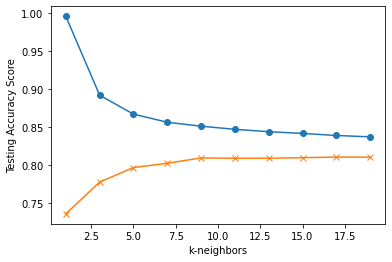

In [130]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k-neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [131]:
# Note that k:5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.796


In [132]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [133]:
confusion_matrix(y_true, y_pred)

array([[5184,  803],
       [1141, 2416]], dtype=int64)

In [134]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      5987
           1       0.75      0.68      0.71      3557

    accuracy                           0.80      9544
   macro avg       0.79      0.77      0.78      9544
weighted avg       0.79      0.80      0.79      9544



## Instead of a pure binary output, the KNN model also has a predict_proba() method, which returns probability estimates for given input.¶

In [135]:
#For example, here are the first 10 predictions of the testing set.

In [136]:
knn.predict(X_test_scaled[0:10])

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [137]:
# And, here are the first 10 probability estimates of the testing set.

In [138]:
# Note that each pair always adds up to exactly 1

knn.predict_proba(X_test_scaled[0:10])

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [139]:
knn.predict_proba(X_test_scaled[0:10])[:,1]

array([1. , 0. , 0. , 1. , 0.4, 0. , 0. , 0. , 0. , 0. ])

## Feature importances:

In [140]:
feature_importances = clf.feature_importances_
feature_importances

array([0.30470157, 0.05810905, 0.16699212, 0.15608329, 0.09708756,
       0.06155996, 0.08979899, 0.01978455, 0.01766637, 0.00664644,
       0.01021778, 0.01135232])

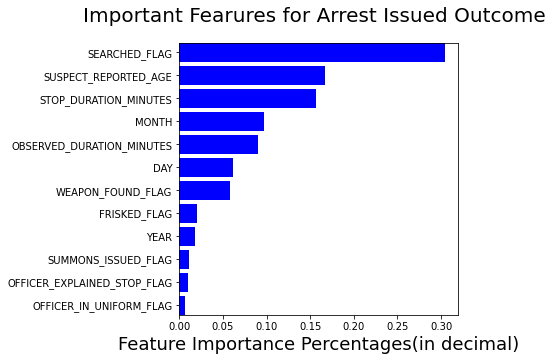

In [141]:
features = sorted(zip(X_train.columns[:12], clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.suptitle('Important Fearures for Arrest Issued Outcome', fontsize=20)
plt.xlabel('Feature Importance Percentages(in decimal)', fontsize=18)
# plt.ylabel('Important Feature Names', fontsize=16)

fig.set_size_inches(5, 5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width, color='b')
plt.savefig('../images/arrest_reduced_feature.PNG')
plt.show()

In [142]:
features

[('OFFICER_IN_UNIFORM_FLAG', 0.006646438105630702),
 ('OFFICER_EXPLAINED_STOP_FLAG', 0.010217782296036718),
 ('SUMMONS_ISSUED_FLAG', 0.011352318351668394),
 ('YEAR', 0.017666373414195767),
 ('FRISKED_FLAG', 0.019784550851165487),
 ('WEAPON_FOUND_FLAG', 0.0581090537445222),
 ('DAY', 0.061559956511202635),
 ('OBSERVED_DURATION_MINUTES', 0.08979898948232115),
 ('MONTH', 0.09708756318231188),
 ('STOP_DURATION_MINUTES', 0.1560832890845154),
 ('SUSPECT_REPORTED_AGE', 0.16699211771719566),
 ('SEARCHED_FLAG', 0.30470156725923403)]

In [143]:
cols

['OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'SUMMONS_ISSUED_FLAG',
 'YEAR',
 'FRISKED_FLAG',
 'WEAPON_FOUND_FLAG',
 'DAY',
 'OBSERVED_DURATION_MINUTES',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_REPORTED_AGE',
 'SEARCHED_FLAG']

In [144]:
width

[0.006646438105630702,
 0.010217782296036718,
 0.011352318351668394,
 0.017666373414195767,
 0.019784550851165487,
 0.0581090537445222,
 0.061559956511202635,
 0.08979898948232115,
 0.09708756318231188,
 0.1560832890845154,
 0.16699211771719566,
 0.30470156725923403]

In [145]:
selected_cols = [f[0] for f in features][-12:]
selected_cols

['OFFICER_IN_UNIFORM_FLAG',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'SUMMONS_ISSUED_FLAG',
 'YEAR',
 'FRISKED_FLAG',
 'WEAPON_FOUND_FLAG',
 'DAY',
 'OBSERVED_DURATION_MINUTES',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_REPORTED_AGE',
 'SEARCHED_FLAG']

In [147]:
import joblib
joblib.dump(clf, 'reduced_features_random_forest_arrest.joblib')

['reduced_features_random_forest_arrest.joblib']

In [148]:
# # Load the model from the file
clf_from_joblib = joblib.load('reduced_features_random_forest_arrest.joblib')
clf_from_joblib

ExtraTreesClassifier(random_state=1)

In [149]:
# # Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
# # Note that each pair always adds up to exactly 1
clf_from_joblib.predict_proba(X_test[0:10])

array([[0.53, 0.47],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.66, 0.34],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.76, 0.24]])

In [151]:
# it means 40% 0 and 60% 1
# it means 60% 0 and 40% 1

# We're concerned only with the second column. The predict() method is setting a cutoff of 0.5. 
#If the predicted probability is 0.5 or greater, it returns 1. Otherwise, it returns 0.